In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

In [37]:
df_neg_pi_mc = pd.read_parquet("/home/mdicosta/hf_pid_studies/distributions/distributions/k0s/pp/neg_pi_eff_df_mc.parquet", engine="pyarrow") 
df_pos_pi_mc = pd.read_parquet("/home/mdicosta/hf_pid_studies/distributions/distributions/k0s/pp/pos_pi_eff_df_mc.parquet", engine="pyarrow") 
df_neg_pi = pd.read_parquet("/home/mdicosta/hf_pid_studies/distributions/distributions/k0s/pp/neg_pi_eff_df.parquet", engine="pyarrow") 
df_pos_pi = pd.read_parquet("/home/mdicosta/hf_pid_studies/distributions/distributions/k0s/pp/pos_pi_eff_df.parquet", engine="pyarrow") 

In [38]:
df_neg_pi_mc

,fOccupancyFt0c,fPt,fNSigmaTpcPosPi,fNSigmaTpcPosPi_unc,fNSigmaTpcNegPi,fNSigmaTpcNegPi_unc,fNSigmaTofPosPi,fNSigmaTofPosPi_unc,fNSigmaTofNegPi,fNSigmaTofNegPi_unc
0,"[0, 5000)","[0.2, 0.3)","[0.8785046728971962, 0.8746564046179219, 0.869...","[0.005416521581781118, 0.005489571764035302, 0...","[1.0, 1.0, 1.0]","[0.0, 0.0, 0.0]","[0.9964266080263882, 0.9590434304562947, 0.689...","[0.0009893082699822062, 0.003285863943739395, ...","[0.9972512369433755, 0.9540956569543705, 0.675...","[0.0008680397178122538, 0.0034696965983578507,..."
1,"[0, 5000)","[0.3, 0.4)","[0.8592669432918395, 0.8520055325034578, 0.842...","[0.004572439526746092, 0.004669063769231204, 0...","[0.9671507607192255, 0.9655947441217151, 0.963...","[0.0023436653814858026, 0.0023966008030333386,...","[0.9977524204702628, 0.9552213001383126, 0.691...","[0.0006226654762362022, 0.0027194031532210006,...","[0.997060857538036, 0.9540110650069157, 0.6836...","[0.0007117984041220543, 0.0027541604656508884,..."
2,"[0, 5000)","[0.4, 0.5)","[0.8393574297188755, 0.831004016064257, 0.8213...","[0.004654082888525819, 0.00474974260726139, 0....","[0.824578313253012, 0.815582329317269, 0.80289...","[0.004820453720014325, 0.004915475005096945, 0...","[0.9983935742971888, 0.9583935742971887, 0.680...","[0.0005075882180271038, 0.0025309436322379637,...","[0.9977510040160642, 0.9542168674698795, 0.680...","[0.0006003931778694147, 0.002649150422452281, ..."
3,"[0, 5000)","[0.5, 0.6)","[0.8333974605617546, 0.8241631396691035, 0.812...","[0.0051683124049196885, 0.005280115421917455, ...","[0.7699115044247787, 0.7575990765679107, 0.745...","[0.005837806815458344, 0.005943861972036701, 0...","[0.9961523662947287, 0.9582531742978069, 0.692...","[0.0008587002871634317, 0.002774174178254412, ...","[0.9971142747210465, 0.9544055405925356, 0.675...","[0.000744015222377119, 0.0028933726623737196, ..."
4,"[0, 6000)","[0.2, 0.3)","[0.8838900086380651, 0.8790670889720703, 0.872...","[0.0027180129488549136, 0.0027663101912924807,...","[1.0, 1.0, 1.0]","[0.0, 0.0, 0.0]","[0.9971206449755254, 0.9563057875035992, 0.687...","[0.0004546100947632998, 0.0017343149307197283,...","[0.9970486610999136, 0.9545061906133027, 0.678...","[0.00046024102797157597, 0.0017680035765157347..."
5,"[0, 6000)","[0.3, 0.4)","[0.8595433385058745, 0.8530702726668145, 0.843...","[0.0023135753287637597, 0.0023573595364292333,...","[0.9666592773221016, 0.9649745067612503, 0.962...","[0.001195371233976716, 0.0012241330803329424, ...","[0.997738860563068, 0.9561959654178674, 0.6878...","[0.0003162646852850381, 0.00136272773278705, 0...","[0.9971624916869873, 0.9543781866548438, 0.685...","[0.00035418496581029595, 0.001389393005459688,..."
6,"[0, 6000)","[0.4, 0.5)","[0.8404205106200386, 0.8327826646642351, 0.823...","[0.0023989008778081446, 0.0024444543640471353,...","[0.8168633340484874, 0.808152756919116, 0.7955...","[0.002533598536069364, 0.002579288709482375, 0...","[0.9977258099120361, 0.9553743831795752, 0.682...","[0.0003120286204895676, 0.001352553207015626, ...","[0.9974683544303797, 0.9527569191160695, 0.684...","[0.000329174710018775, 0.0013897465606326099, ..."
7,"[0, 6000)","[0.5, 0.6)","[0.8324422475537173, 0.8241702814486028, 0.814...","[0.0026524167925101815, 0.0027035665515266916,...","[0.7687884595985071, 0.7572884091596893, 0.744...","[0.0029942677336709457, 0.0030447971352917783,...","[0.9967719156662967, 0.9519318067184506, 0.681...","[0.00040285873223462024, 0.0015191976065373851...","[0.9972258650257237, 0.9534449712498739, 0.677...","[0.00037354507087474534, 0.0014962823908104986..."


In [39]:
def convert_to_interval(interval_str):
    match = re.match(r"(\[|\()(\d+(\.\d+)?),\s*(\d+(\.\d+)?)(\]|\))", interval_str)
    if match:
        # Extract the left and right bounds, converting them to float
        left = float(match.group(2))  # Group 2 captures the left bound
        right = float(match.group(4))  # Group 4 captures the right bound
        
        # Determine if the interval is closed on the left or right
        closed = 'left' if match.group(1) == '[' else 'right'
        # Return the interval as a pandas Interval
        return pd.Interval(left, right, closed=closed)
    
    # If the string doesn't match the interval format, return None
    return None  

def sort_df_by_interval(df, col):
    # Use .loc[] to safely modify the DataFrame and avoid the SettingWithCopyWarning
    df.loc[:, "lower_bound"] = df[col].apply(lambda x: x.left)  # Extract left bound
    df_sorted = df.sort_values("lower_bound").drop(columns="lower_bound")  # Sort and drop helper column
    return df_sorted

def get_label(diff_col_name):
    if diff_col_name == "fPt":
        return '$p_T$ (GeV/$c$)'
    if diff_col_name == "fOccupancyFt0c":
        return 'Occupancy FTOC (arb. units)'
    if diff_col_name == "fCentralityFT0C" or diff_col_name == "fCentralityFT0M":
        return 'Centrality'

In [40]:
interval_cols = ['fPt', 'fOccupancyFt0c']

for col in interval_cols:
    df_neg_pi_mc[col] = df_neg_pi_mc[col].apply(convert_to_interval) 
    df_pos_pi_mc[col] = df_pos_pi_mc[col].apply(convert_to_interval) 
    df_neg_pi[col] = df_neg_pi[col].apply(convert_to_interval) 
    df_pos_pi[col] = df_pos_pi[col].apply(convert_to_interval)

In [41]:
def draw_efficiencies(dfs_data, dfs_mc, leg_entries, diff_col_name, eff_var):
    
    sort_dfs_data, sort_dfs_mc = [], []
    for df_data, df_mc in zip(dfs_data, dfs_mc):
        sort_dfs_data.append(sort_df_by_interval(df_data, diff_col_name))
        sort_dfs_mc.append(sort_df_by_interval(df_mc, diff_col_name))
    
    fig, axs = plt.subplots(3, 2, figsize=(15, 25))

    lower_bin_bounds = sort_dfs_data[0][diff_col_name].apply(lambda x: x.left)
    upper_bin_bounds = sort_dfs_data[0][diff_col_name].apply(lambda x: x.right)
    bin_centers = (np.array(lower_bin_bounds) + np.array(upper_bin_bounds)) / 2
    bin_widths = (np.array(upper_bin_bounds) - np.array(lower_bin_bounds)) / 2
    print(lower_bin_bounds)
    print(upper_bin_bounds)
    ticks = list(lower_bin_bounds) + [list(upper_bin_bounds)[-1]]
    for ax in axs.flat:
        ax.set_xticks(ticks)
        ax.set_xticklabels(ticks, rotation=45, ha='right')
    
    n_sigma_vals = [3,2,1]
    for icase, n_sigma in enumerate(n_sigma_vals):
        for df_data, df_mc, leg_entry in zip(sort_dfs_data, sort_dfs_mc, leg_entries):
            n_sigma_effs_data, n_sigma_effs_uncs_data, n_sigma_effs_mc, n_sigma_effs_uncs_mc = [], [], [], []
            for entry in range(len(df_data)):
                n_sigma_effs_data.append(df_data.loc[entry, eff_var][icase])
                n_sigma_effs_uncs_data.append(df_data.loc[entry, f"{eff_var}_unc"][icase])
                n_sigma_effs_mc.append(df_mc.loc[entry, eff_var][icase])
                n_sigma_effs_uncs_mc.append(df_mc.loc[entry, f"{eff_var}_unc"][icase])

            axs[icase, 0].errorbar(bin_centers, n_sigma_effs_data, yerr=n_sigma_effs_uncs_data, 
                        xerr=bin_widths, label=f'data, {leg_entry}', fmt='o')
            axs[icase, 0].errorbar(bin_centers, n_sigma_effs_mc, yerr=n_sigma_effs_uncs_mc, 
                        xerr=bin_widths, label=f'mc, {leg_entry}', fmt='o')

            axs[icase, 0].set_title(f"|{eff_var}| < {n_sigma}")
            axs[icase, 0].set_ylabel('Efficiency')
            # axs[icase, 0].set_ylim(min_eff.min()/2, 1.2)
            axs[icase, 0].set_xlabel(get_label(diff_col_name))
            axs[icase, 0].legend()
            axs[icase, 0].set_yscale('log')
            axs[icase, 0].grid(True)

            ratio = np.array(n_sigma_effs_data) / np.array(n_sigma_effs_mc)
            ratio_unc = ratio * np.sqrt((np.array(n_sigma_effs_uncs_data) / np.array(n_sigma_effs_data))**2 + (np.array(n_sigma_effs_uncs_mc) / np.array(n_sigma_effs_mc))**2)
            axs[icase, 1].errorbar(bin_centers, ratio, yerr=ratio_unc, xerr=bin_widths, label=leg_entry, fmt='o')

            axs[icase, 1].set_title(f"Ratio |{eff_var}| < {n_sigma}")
            axs[icase, 1].set_xlabel(get_label(diff_col_name))
            axs[icase, 1].set_ylabel('Data / MC')
            # axs[icase, 1].set_ylim(min_ratio*0.95, max_ratio*1.05)
            axs[icase, 1].legend()
            axs[icase, 1].grid(True)

    # min_eff = 1
    # max_eff = 0
    # if np.array(effs).flatten()[np.array(effs).flatten()!=0].min() < min_eff:
    #     min_eff = np.array(effs).flatten()[np.array(effs).flatten()!=0].min()
    # if np.array(effs).flatten().max() > max_eff:
    #     max_eff = np.array(effs).flatten().max()

    # min_ratio = 1000
    # max_ratio = 0
    # if ratio[~np.isnan(ratio)].min() < min_ratio:
    #     min_ratio = ratio[~np.isnan(ratio)].min()
    # if ratio[~np.isnan(ratio)].max() > max_ratio:
    #     max_ratio = ratio[~np.isnan(ratio)].max()

    return fig

0    0.2
1    0.3
2    0.4
3    0.5
Name: fPt, dtype: float64
0    0.3
1    0.4
2    0.5
3    0.6
Name: fPt, dtype: float64


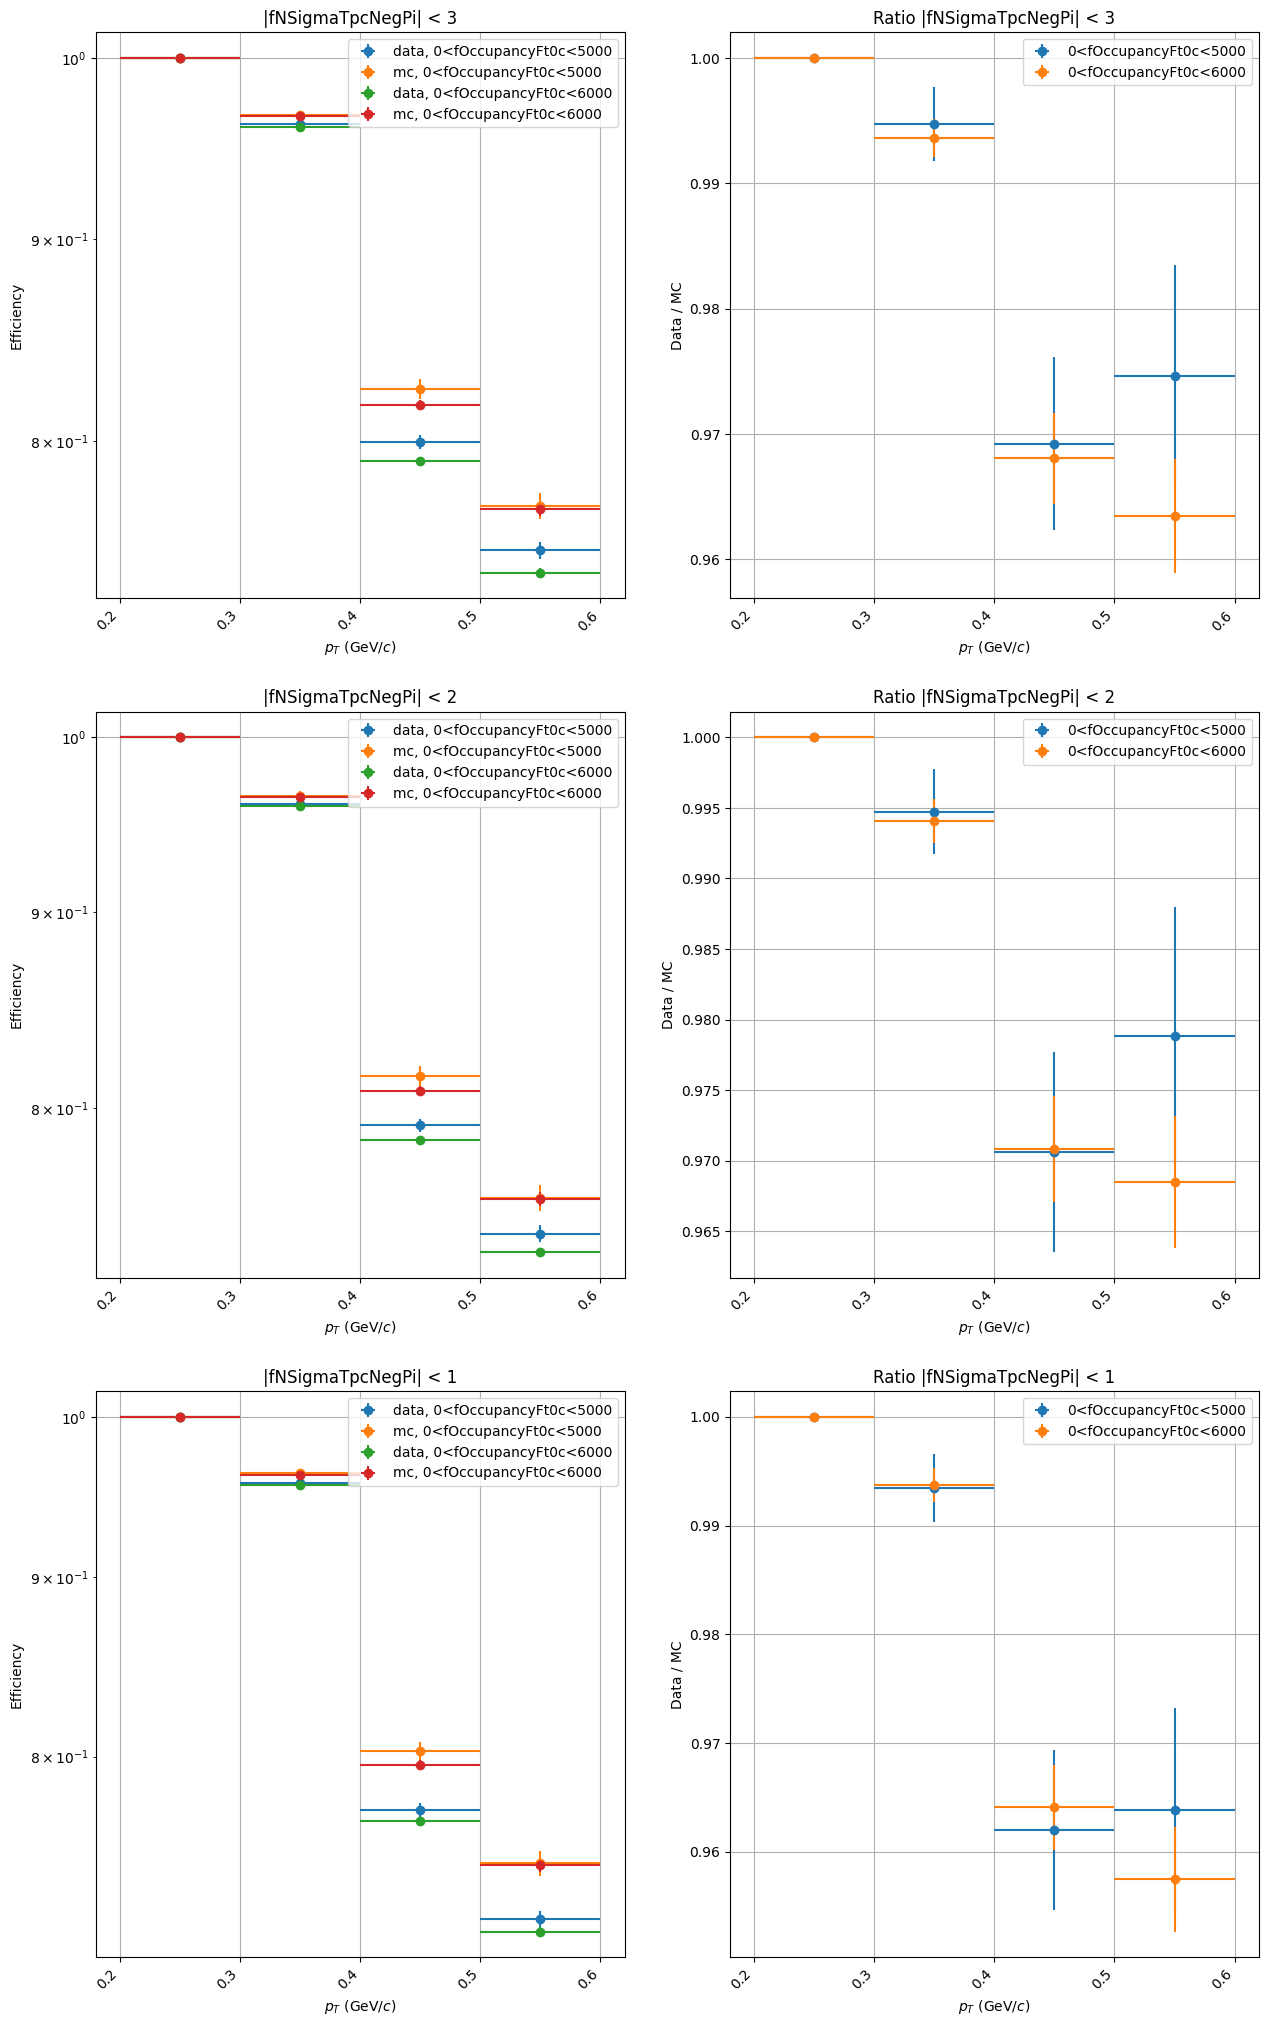

In [42]:
df_neg_pi_data_occ_0_5000 = df_neg_pi.query('fOccupancyFt0c == @pd.Interval(0, 5000, closed="left")').reset_index(drop=True)
df_neg_pi_mc_occ_0_5000 = df_neg_pi_mc.query('fOccupancyFt0c == @pd.Interval(0, 5000, closed="left")').reset_index(drop=True)
df_neg_pi_data_occ_0_6000 = df_neg_pi.query('fOccupancyFt0c == @pd.Interval(0, 6000, closed="left")').reset_index(drop=True)
df_neg_pi_mc_occ_0_6000 = df_neg_pi_mc.query('fOccupancyFt0c == @pd.Interval(0, 6000, closed="left")').reset_index(drop=True)
fig_occ_neg_pi = draw_efficiencies([df_neg_pi_data_occ_0_5000, df_neg_pi_data_occ_0_6000], [df_neg_pi_mc_occ_0_5000, df_neg_pi_mc_occ_0_6000], ['0<fOccupancyFt0c<5000', '0<fOccupancyFt0c<6000'], 'fPt', 'fNSigmaTpcNegPi')
